<a href="https://colab.research.google.com/github/KeisukeTobisawa/KeisukeTobisawa/blob/main/Runge_Kutta_Response.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import numpy as np
from matplotlib import pyplot as plt
import time
import csv

[ -1.4 -10.8 -10.1 ...  -3.7  -2.6  -1.4]
[6.61223659e-05 9.84495315e-04 5.04062407e-03 ... 7.45882850e-03
 1.48928695e-02 2.05399824e-02] [0.01093205 0.10904058 0.28712722 ... 0.38922709 0.34009033 0.21337834] [ -1.45190056 -11.46022202 -12.91242297 ...  -7.78700361  -9.84502711
 -10.85674304]
692.5681273138807


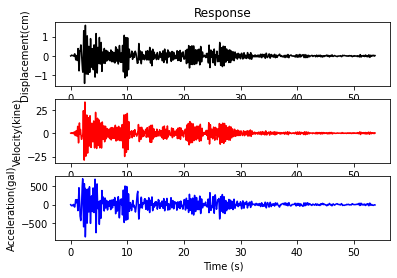

In [22]:
#書き換えた微分方程式の関数
def EOM(m,c,k,w,y,v):
  Y = v
  V = w -(c / m) * v - (k / m) * y
  return Y,V

#加速度記録の読み込み
with open('/content/drive/MyDrive/research1994/94-El_Centro.csv', encoding = 'utf-8-sig') as f:
  reader = csv.reader(f)
  wave_list = []
  for row in reader:
    wave_list.append(row)

wname = wave_list[0][0]                #地震名
dt = float(wave_list[1][1])            #サンプリングピッチ
count = float(wave_list[2][1])         #データ数
wave = []                              #加速度データ
for i in wave_list[3:]:
  j = i[0]
  wave.append(float(j))
wave = np.array(wave)

print(wave)

#振動方程式パラメータ
m = 1.0
h = 0.05
T = 0.3
k = 4*np.pi**2*m/T**2
c = 2*h*np.sqrt(k*m)
w = -wave


#解析条件
t0 = 0.0
ti = dt * len(wave)
t_axis = np.arange(t0,ti,dt)


md = 5                            #分割数
ddt = dt/float(md)                #積分ピッチ

#初期条件
y_axis = np.zeros(len(t_axis))
v_axis = np.zeros(len(t_axis))
a_axis = np.zeros(len(t_axis))

y0 = 0.0
v0 = 0.0

y1 = y0
v1 = v0

for t in range(0,len(t_axis)):    #加速度データの準備
  w1 = 0.0
  if t >= 1 :
    w1 = w[t-1]
  w2 = w[t]
  for n in range(0,md):
    wh = w1 + (w2 - w1) / float(md) * float(n) #加速度データn+1/2
    k11,k12 = EOM(m,c,k,wh,y1,v1)
    k21,k22 = EOM(m,c,k,wh,y1+ddt*k11/2.0,v1+ddt*k12/2.0)
    k31,k32 = EOM(m,c,k,wh,y1+ddt*k21/2.0,v1+ddt*k22/2.0)
    k41,k42 = EOM(m,c,k,wh,y1+ddt*k31,v1+ddt*k32)

    y1 += ddt * (k11 + 2 * k21 + 2 * k31 + k41) / 6.0
    v1 += ddt * (k12 + 2 * k22 + 2 * k32 + k42) / 6.0

  a1 = - w2 - c / m * v1 - k / m * y1

  y_axis[t] = y1
  v_axis[t] = v1
  a_axis[t] = a1

print(y_axis,v_axis,a_axis)

print(np.max(a_axis))

#グラフ描画

plt.subplot(3, 1, 1)
plt.plot(t_axis,y_axis, 'k-')
plt.title('Response')
plt.ylabel('Displacement(cm)')

plt.subplot(3, 1, 2)
plt.plot(t_axis,v_axis, 'r-')
plt.ylabel('Velocity(kine)')

plt.subplot(3, 1, 3)
plt.plot(t_axis,a_axis, 'b-')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration(gal)')

plt.show()

In [ ]:
with open('/content/drive/MyDrive/research1994/94-El_Centro.csv', encoding = 'utf-8-sig') as f:
  reader = csv.reader(f)

  wave_list = []
  for row in reader:
    wave_list.append(row)

wname = wave_list[0][0]
dt = float(wave_list[1][1])
count = float(wave_list[2][1])
wave = []
for i in wave_list[3:]:
  j = float(i[0])
  wave.append(j)

wname,dt,count,wave

In [ ]:
with open('/content/drive/MyDrive/research1994/94-El_Centro.csv', encoding = 'utf-8-sig') as f:
    for line in f:
      line = line.strip('\n').split(',')
      print(line)


In [ ]:
with open('/content/drive/MyDrive/research1994/94-El_Centro.csv', encoding = 'utf-8-sig') as f:
  reader = csv.reader(f)

  header = next(reader)
  for i in reader:
    print(i)